<a href="https://colab.research.google.com/github/natanrajch/DiploDatos/blob/main/No_supervisado/ntb_clustering_2_fifa2021_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    
## Aprendizaje No Supervisado DiploDatos
    Laura Alonso Alemany, Ana Georgina Flesia y Valeria Rulloni
## Agrupamiento con el FIFA 2021 dataset
 
Material basado en notas de Ana Georgina Flesia bajo los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/), a su vez basado de material de [SilveMel](https://www.kaggle.com/karangadiya/fifa19/downloads/data.csv/comments) y otros.

### Indice de temas
1. [Inicialización del entorno](#1.-Inicialización-del-entorno)
2. [Preparación de los datos](#2.-Preparación-de-los-datos)
3. [Clustering KM](#3.-Clustering-con-Kmeans)
4. [Clustering MS](#4.-Clustering-con-Mean-Shift)
5. [Clustering KM2](#5.-Clustering-con-Kmeans-sin-arqueros)
6. [Clustering MS2](#6.-Clustering-con-Mean-Shift-sin-arqueros)

## 1.-Inicialización-del-entorno

Empezamos cargando algunas herramientas para cargar los datos y manipularlos.

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [3]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

In [4]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

## 2.-Preparación-de-los-datos

Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/karangadiya/fifa19) como 'data.csv'. 

In [5]:
df=pd.read_csv("data.csv")

FileNotFoundError: ignored

**Preparamos la base para Clustering:**

**Retiramos jugadores con bajo Desempeño global ("Overall")**

**y consideramos Variables de desempeño por habilidad (skills_ratings)**

In [6]:
n=10000
df_n=df.loc[:n] #los primeros n
df_n=df_n[(df_n['overall']>70)] # mejores jugadores

skills_ratings = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
                  'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
                  'gk_positioning', 'attacking_crossing', 'attacking_finishing',
                  'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys',
                  'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
                  'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                  'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina',
                  'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
                  'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
                  'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving',
                  'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

print(len(skills_ratings), 'variables numéricas: skills/habilidades')

df_skills=df_n[skills_ratings]

NameError: ignored

Se completan los valores vacíos con 0 para los skills de los jugadores

In [ ]:
df_skills.fillna(0, inplace=True)

# 3.-Clustering-con-Kmeans

ES necesario definirle la cantidad de grupos/clusters (n_clusters), es un hiperparámetro del algoritmo. 


In [ ]:
# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust)
km.fit(df_skills) #utiliza todas las habilidades: 34 dimensiones

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster=Inertia= ', km.inertia_)

**Elección de la cantidad de grupos/clusters**

Una forma de seleccionar la cantidad más adecuada de clusters es probar varias cantidades y usar el criterio del codo: "elbow method", utilizando una medida de ajuste que puede ser Inertia.

In [ ]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(df_skills).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

**Graficamos el resultado de agrupar a los jugadores usando kmedias con la cantidad de clases elegida: Visualizamos de a dos variables por vez**

In [ ]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1 = 'defending_sliding_tackle'
skill_2 = 'attacking_finishing'

In [ ]:
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Cracks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [ ]:
#En Colab:
fig.show(renderer="colab")

In [ ]:
#En Jupyter:
iplot(fig)
#plot(fig)

In [ ]:
df_clusters=df_n.copy()
df_clusters['kmeans'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')

**EVALUACIÓN**

**EJERCICIO: Análisis exploratorio de los clusters, usando las clases asignadas por kmeans** 
- Cantidad de observaciones por Cluster
- Análisis descriptivo separando por Cluster
- Tabla de contingencia alguna categórica vs clusters
- Silohuette?


#**Clustering con k-means**

###Pasos:

**Inicialización**: se elige la localización de los centroides de los K grupos aleatoriamente

**Asignación**: se asigna cada dato al centroide más cercano

**Actualización**: se actualiza la posición del centroide a la media aritmética de las posiciones de los datos asignados al grupo



![regression-residual-simulation-tutorial2.gif](https://miro.medium.com/max/832/1*O6_nsE3nLwPw1thqaGmTYA.gif)

In [12]:
!unzip /content/archive.zip #como el archivo esta zippeado, lo dezzipeamos

Archive:  /content/archive.zip
  inflating: Career Mode player datasets - FIFA 15-21.xlsx  
  inflating: players_15.csv          
  inflating: players_16.csv          
  inflating: players_17.csv          
  inflating: players_18.csv          
  inflating: players_19.csv          
  inflating: players_20.csv          
  inflating: players_21.csv          


In [13]:
fifa = pd.read_csv('players_21.csv') # abrimos el archivo de 2021 como fifa

In [14]:
fifa.shape

(18944, 106)

In [15]:
fifa[:2]

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   

   height_cm  weight_kg nationality     club_name             league_name  \
0        170         72   Argentina  FC Barcelona  Spain Primera Division   
1        187         83    Portugal      Juventus         Italian Serie A   

   league_rank  overall  potential  value_eur  wage_eur player_positions  \
0          1.0       93         93   67500000    560000       RW, ST, CF   
1          1.0       92         92   46000000    220000           ST, LW   

  preferred_foot  international_reputation  weak_foot  skill_moves  \
0           Left                         5          4            4   
1          Right                         5          4            5   

    work_rate   body_type real_face  release_clause_eur  \
0  Medium/Low       Messi       Yes         138400000.0   
1    High/Low  C. Ronaldo       Yes          75900000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #FK Specialist, ...           CAM   
1  #Aerial Threat, #Dribbler, #Distance Shooter, ...            LS   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0              RW                  10.0  85.0      92.0     91.0       95.0   
1              LS                   7.0  89.0      93.0     81.0       89.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       38.0    65.0        NaN          NaN         NaN          NaN   
1       35.0    77.0        NaN          NaN         NaN          NaN   

   gk_speed  gk_positioning  \
0       NaN             NaN   
1       NaN             NaN   

                                       player_traits  attacking_crossing  \
0  Finesse Shot, Long Shot Taker (AI), Speed Drib...                  85   
1  Power Free-Kick, Flair, Long Shot Taker (AI), ...                  84   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       91   
1                   95                          90                       82   

   ...  movement_acceleration  movement_sprint_speed  movement_agility  \
0  ...                     91                     80                91   
1  ...                     87                     91                87   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  94                95                86             68   
1                  95                71                94             95   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0             72              69                94                    44   
1             84              78                93                    63   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     93                95   
1                       29                     95                82   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                NaN   
1                   84                   95                NaN   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         35                        24                   6   
1                     

In [16]:
n = 10000
fifa_n = fifa.loc[:n] # seleccionamos los primeros n jugadores, en este caso 10000
fifa_n = fifa_n[(fifa_n['overall']>70)] # elegimos los mejores jugadores de esos 10000 basados en su puntuacion general

In [17]:
skills_ratings = ['pace', 'shooting', 'passing', 'dribbling',
                  'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
                  'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing', 'attacking_finishing',
                  'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy',
                  'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
                  'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
                  'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
                  'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking',
                  'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
                  'goalkeeping_positioning', 'goalkeeping_reflexes'] # Definimos cuales son los skills o habilidades del dataset

print(len(skills_ratings), 'variables numéricas: skills/habilidades')

fifa_skills = fifa_n[skills_ratings] # como los skills estan dentro de un rango de 0 a 100, no debo estandarizar. Ya estan estandarizados.

46 variables numéricas: skills/habilidades


In [18]:
fifa_skills.isna().sum() # Chequeamos si tenemos valores nulos 

pace                           444
shooting                       444
passing                        444
dribbling                      444
defending                      444
physic                         444
gk_diving                     4068
gk_handling                   4068
gk_kicking                    4068
gk_reflexes                   4068
gk_speed                      4068
gk_positioning                4068
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy                0
skill_long_passing               0
skill_ball_control               0
movement_acceleration            0
movement_sprint_speed            0
movement_agility                 0
movement_reactions               0
movement_balance                 0
power_shot_power                 0
power_jumping       

In [19]:
fifa_skills.fillna(0, inplace=True) # Rellenamos los valores nulos con ceros

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

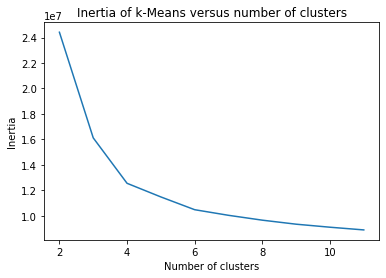

In [20]:
# Probamos con distintos numeros de clusters para ver cual es el mejor, utilizando el metodo del codo

scores = [KMeans(n_clusters=i, random_state=0).fit(fifa_skills).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores) # El numero indicado de clusters parece ser 6, de acuerdo a la inercia (cuan coherentes resultaron los clusters)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [21]:
n_clust = 6
km = KMeans(n_clusters = n_clust)
km.fit(fifa_skills) 
# Recuperacion de etiquetas
clusters = km.labels_

In [22]:
# Distingo entre cracks y no craks:
bool_crack = fifa_n["overall"] > 85 
bool_no_crack = fifa_n["overall"] < 86

In [23]:
#Elijo 2 skills al azar, para ver si me explican algo detras de los clusters:
skill_1 = skills_ratings[3] # el skill 4 (dribbling)
skill_2 = skills_ratings[25] # el skill 25 (movement_reactions)

In [24]:
# Grafico
kmean_clusters = go.Scatter(x = fifa_skills[skill_1], y = fifa_skills[skill_2],
                           mode='markers',
                        text = fifa_n.loc[:,'short_name'],
                           marker = dict(
                                size = 5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale = 'Portland',
                                showscale = False)
                           ) # Muestra los clusters identificados por el k-means como optimos, separados por colores.

crack = go.Scatter(x = fifa_skills.loc[bool_crack, skill_1], y = fifa_skills.loc[bool_crack, skill_2], name = 'Cracks',
                     text = fifa_n.loc[bool_crack,'short_name'],
                     textfont = dict(family ='sans serif', size = 10, color = 'black'),
                    opacity = 0.9, mode = 'text') # Me identifica los jugadores de mas de 85 puntos de skills combinados

data = [kmean_clusters, crack] 

layout = go.Layout(title = "Clustering K means = 6 ",titlefont=dict(size = 20),
                xaxis = dict(title = skill_1),
                yaxis = dict(title = skill_2),
                autosize = False, width = 1000, height = 650)

fig = go.Figure(data = data, layout = layout)
fig.show(renderer = "colab")

Los arqueros tienen cero dribbling, ya que no suelen jugar con los pies! Mientras que los mejores arqueros, que se ubican en la esquina superior izquierda, tienen una alta capacidad de reacción en sus movimientos. Los peores arqueros, como es de esperar, no tienen mucha capacidad de reacción.
Por otra parte, los mejores jugadores no arqueros tienen el mayor dribbling y la mayor capacidad de reacción.

In [25]:
best_kmean_clusters = fifa_n.copy()
best_kmean_clusters['kmeans'] = km.labels_ #clusters
print('Kmeans encontró:', max(km.labels_)+1, 'clusters')

Kmeans encontró: 6 clusters


Text(0.5, 1.0, 'Cantidad de observaciones por Cluster')

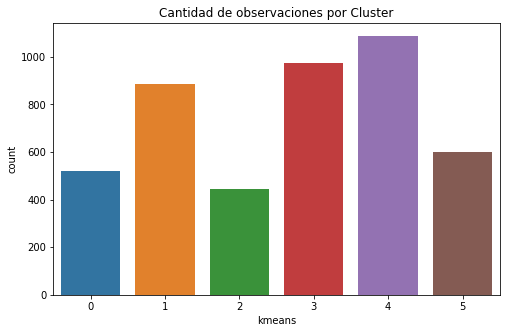

In [26]:
# Veamos cuantas observaciones (jugadores) quedaron en cada uno de los 6 clusters:

fig, ax = plt.subplots(1,1, figsize=(8,5))
sns.countplot(best_kmean_clusters.kmeans, ax=ax)
ax.set_title('Cantidad de observaciones por Cluster')

In [27]:
for cluster in [0,1,2,3,4,5]:
  print('Análisis descriptivo de cluster #', cluster,':')
  print('    Conteo:', sum(best_kmean_clusters.kmeans == cluster))
  print('    Edad promedio:', "%.2f" % best_kmean_clusters[best_kmean_clusters.kmeans == cluster].age.mean())
  print('    Principales Skills:')
  for skill, value in best_kmean_clusters[best_kmean_clusters.kmeans == cluster].describe()[skills_ratings].loc['mean',:].sort_values(ascending=False)[:5].items():
    print('       ',skill,':', '%.2f' % value)

Análisis descriptivo de cluster # 0 :
    Conteo: 521
    Edad promedio: 27.96
    Principales Skills:
        power_strength : 77.89
        power_shot_power : 77.25
        mentality_positioning : 77.12
        attacking_finishing : 76.52
        shooting : 74.60
Análisis descriptivo de cluster # 1 :
    Conteo: 886
    Edad promedio: 26.56
    Principales Skills:
        power_stamina : 77.61
        mentality_aggression : 73.20
        defending_standing_tackle : 73.16
        movement_sprint_speed : 73.06
        pace : 72.90
Análisis descriptivo de cluster # 2 :
    Conteo: 444
    Edad promedio: 29.77
    Principales Skills:
        goalkeeping_reflexes : 77.06
        gk_reflexes : 77.06
        goalkeeping_diving : 75.59
        gk_diving : 75.59
        goalkeeping_positioning : 74.57
Análisis descriptivo de cluster # 3 :
    Conteo: 974
    Edad promedio: 26.50
    Principales Skills:
        movement_agility : 81.37
        movement_acceleration : 80.34
        pace : 79.17

Partiendo de un análisis de los skills, el cluster 1 pertenece definitivamente a los **arqueros**. Es también el cluster menos numeroso y el que llega a una edad, en promedio, más alta.

El resto de los clusters no está tan claramente definido como el de los arqueros. Sin embargo, se pueden apreciar ciertos atributos que asignarían grandes grupos de jugadores: defensa, mediocampo y ataque.

Los clusters 0 y 4 estarían agrupando **defensores**. El cluster 0, a defensores muy veloces con capacidad de subir y bajar en su posición. El cluster 4, en cambio, incluye defensores más robustos, más fijos en sus posiciones. 

El cluster 5 agrupa a **delanteros**, dado que incluye jugadores con alta capacidad de ataque y excelente capacidad de tiro al arco. 

Finalmente, los clusters 2 y 3 estrían agrupando a **mediocampistas**. El grupo 2 incluye jugadores con mucha agilidad, aceleración y velcidad, por lo que puede que se ubiquen más cerca de los delanteros. El grupo 3 incluye habilidades como el control, el dribbling y la potencia, por lo que estos jugadores se ubicarían más en el centro del juego.

In [28]:
# Tabla de contingencia: 1 categórica vs. clusters
# Probamos con la altura:

pd.crosstab(best_kmean_clusters['kmeans'], best_kmean_clusters['height_cm'], margins = True)


height_cm  157  158  160  161  162  163  164  165  166  167  168  169  170  \
kmeans                                                                       
0            0    0    0    0    0    0    0    2    0    0    0    1    2   
1            0    0    0    0    0    0    0    2    4    7   16    7   27   
2            0    0    0    0    0    0    0    0    0    0    0    0    0   
3            1    2    1    3    1    6    4   12    5   14   28   26   54   
4            0    0    0    0    0    0    1    3    2    9    9   12   21   
5            0    0    0    0    0    0    0    0    0    0    0    0    0   
All          1    2    1    3    1    6    5   19   11   30   53   46  104   

height_cm  171  172  173  174  175  176  177  178  179  180  181  182  183  \
kmeans                                                                       
0            2    2    1   11   13    6   19   15   15   37   28   29   37   
1           16   23   33   33   55   52   50   67   30   75   41   59   69   
2            0    0    0    0    1    0    1    2    3    7    5   10   16   
3           42   52   66   55   94   57   64   82   55   79   33   29   36   
4           19   41   41   39   71   50   55   90   43  106   54   58   64   
5            1    0    0    0    3    1    1    6    3   14   17   19   29   
All         80  118  141  138  237  166  190  262  149  318  178  204  251   

height_cm  184  185  186  187  188  189  190  191  192  193  194  195  196  \
kmeans                                                                       
0           29   44   40   38   41   19   22   14   12   17    8    3    7   
1           45   45   42   24   27   12    6    6    5    1    3    2    2   
2           23   26   26   33   54   28   46   29   30   29   18   16   19   
3           23   18    8    8    7    3    5    0    1    0    0    0    0   
4           56   55   51   40   37   22   14   10    4    6    3    1    0   
5           28   61   49   47   67   49   59   39   36   25   18   11   10   
All        204  249  216  190  233  133  152   98   88   78   50   33   38   

height_cm  197  198  199  200  201  203   All  
kmeans                                         
0            4    1    0    0    2    0   521  
1            0    0    0    0    0    0   886  
2            8    8    2    1    2    1   444  
3            0    0    0    0    0    0   974  
4            1    0    0    0    0    0  1088  
5            3    1    2    0    0    0   599  
All         16   10    4    1    4    1  4512

Si analizamos las alturas podemos ver que efectivamente el cluster 1, que agrupa a los arqueros, tiene la menor cantidad de jugadores de baja estatura (el más petiso mide 1.75 m) y la mayor cantidad de jugadores de alta estatura. De hecho, tiene el jugador más alto (de 2.03 m).

También podemos ver que hay otros dos clusters con jugadores altos: el cluster 0, que agrupa a los defensores más veloces, y el cluster 5, que agrupa a los delanteros. 

Los jugadores más bajos están agrupados en el cluster 3, que se corresponderían a jugadores de medio campo. 

In [29]:
# Silhouette
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(fifa_skills, clusters))

Silhouette Coefficient: 0.249


# 4.-Clustering-Mean-Shift 

- NO es necesario definirle la cantidad de grupos/clusters
- NO es escalable, computacionalmente es muy pesado. Cada dato tienen un proceso iterativo en donde en cada iteración considera los vecinos a menos de un radio de distancia.
- Hipeparámetros: radio/bandwith (de cobertura para cálculo de media). (Probar con varios)

In [ ]:
ms = MeanShift(bandwidth=80)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 3


Se probó con varios valores de bandwith:
* 0.5 --> 4511 clusters
* 1 --> 4511 clusters
* 10 --> 4498 clusters
* 40 --> 555 clusters
* 80 --> 3 cluster
* sin especificar (estimate_bandwith=109,16) --> 2

Se mantiene entonces el valor de 80 para bandwith.

Graficamos los resultados:

In [ ]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Elijo dos números entre 0 y  de n_skills-1
skill_1='skill_ball_control'
skill_2='power_strength'

In [ ]:
data=[]
MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [ ]:
#En Colab
fig.show(renderer="colab")

In [ ]:
df_clusters['MeanShift'] = ms.labels_ #clusters2
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  5 clusters, nosotros lo forzamos
Mean shift encontró  3 clusters, según los hiperparámetros elegidos


**EVALUACIÓN**

**EJERCICIO EN GRUPO: Análisis exploratorio de los clusters, usando las clases asignadas por MeanShift** 

Text(0.5, 1.0, 'Cantidad de observaciones por Cluster')

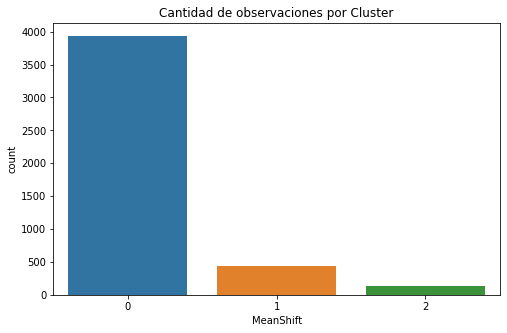

In [ ]:
#Cantidad de observaciones por Cluster
fig, ax = plt.subplots(1,1, figsize=(8,5))
sns.countplot(df_clusters.MeanShift, ax=ax)
ax.set_title('Cantidad de observaciones por Cluster')


In [ ]:
for cluster in [0,1,2]:
  print('Análisis descriptivo de cluster #', cluster,':')
  print('    Conteo:', sum(df_clusters.MeanShift == cluster))
  print('    Edad promedio:', "%.2f" % df_clusters[df_clusters.MeanShift==cluster].age.mean())
  print('    Principales Skills:')
  for skill, value in df_clusters[df_clusters.MeanShift==cluster].describe()[skills_ratings].loc['mean',:].sort_values(ascending=False)[:5].items():
    print('       ',skill,':', '%.2f' % value)


Análisis descriptivo de cluster # 0 :
    Conteo: 3934
    Edad promedio: 27.25
    Principales Skills:
        power_stamina : 73.61
        skill_ball_control : 73.31
        attacking_short_passing : 72.46
        movement_reactions : 72.37
        dribbling : 71.75
Análisis descriptivo de cluster # 1 :
    Conteo: 444
    Edad promedio: 29.77
    Principales Skills:
        goalkeeping_reflexes : 77.06
        gk_reflexes : 77.06
        goalkeeping_diving : 75.59
        gk_diving : 75.59
        goalkeeping_positioning : 74.57
Análisis descriptivo de cluster # 2 :
    Conteo: 134
    Edad promedio: 27.90
    Principales Skills:
        power_strength : 82.99
        mentality_aggression : 76.96
        physic : 76.21
        defending_standing_tackle : 75.85
        attacking_heading_accuracy : 75.39


Analizando los datos, se puede observar que el algoritmo ha creado 3 grupos principales: 
* el Grupo 2 corresponde a DEFENSORES,
* el grupo 1 corresponde a ARQUEROS,
* el grupo 0 corresponde a LOS DEMÁS (y que obviamente, resultan los más numerosos)

In [ ]:
# Tabla de contingencia alguna categórica vs clusters
data_crosstab = pd.crosstab(df_clusters['MeanShift'],
                            df_clusters['preferred_foot'], 
                               margins = True)
print(data_crosstab)



preferred_foot  Left  Right   All
MeanShift                        
0               1077   2857  3934
1                 55    389   444
2                 22    112   134
All             1154   3358  4512


Hay, proporcionalmente, muchos menos arqueros zurdos!
Quizás esto tenga que ver con que ser zurdo como arquero no implica tanta ventaja como sí lo implica como jugador

In [ ]:
# Silhouette
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df_skills, clusters2))

Silhouette Coefficient: 0.340


**Pregunta: normalizamos/estandarizamos la base?**

No tiene sentido normalizar feature a feature, ya que los skills son variables que ya están todas en el mismo rango 0 a 100.

Sin embargo quizás si lo tenga realizar una normalización jugador a jugador (para sólo evaluar la composición de las habilidades de los jugadores, sin separar por overall rating). 

Esto se hará al final del análisis.


**Ahora vemos que agrupamientos se pueden hacer excluyendo los arqueros**

# 5.-Clustering-con-Kmeans-sin-arqueros

In [30]:
n = 10000
fifa_n2 = fifa.loc[:n]
fifa_n2 = fifa_n2[(fifa_n2.player_positions.apply(lambda row: 'GK' not in row))&(fifa_n2['overall']>69)]

skills_ratings = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',                  
                  'attacking_crossing', 'attacking_finishing',
                  'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys',
                  'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
                  'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                  'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina',
                  'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
                  'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
                  'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle']

fifa_skills2 = fifa_n2[skills_ratings]
fifa_skills2.fillna(0, inplace=True)

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

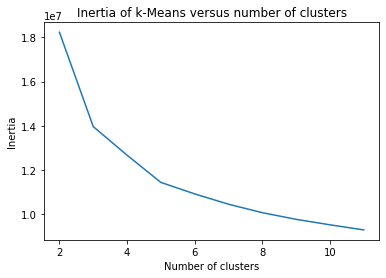

In [31]:
# Será la misma cantidad de clusters sin arqueros?
scores = [KMeans(n_clusters=i, random_state=0).fit(fifa_skills2).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores) # El numero indicado de clusters parece ser 5, de acuerdo a la inercia (cuan coherentes resultaron los clusters)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

Sin arqueros kmeans agrupa con mayor coherencia interna 5 clusters en vez de 6 (lo cual tiene mucha lógica si pensamos que los arqueros habían quedado bastante diferenciados y definidos en un cluster aparte en el análisis anterior)

In [32]:
# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters = n_clust)
km.fit(fifa_skills2)

# Recuperacion de etiquetas
clusters = km.labels_

In [33]:
#data=[]
bool_crack=fifa_n2["overall"] > 85
bool_no_crack=fifa_n2["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[4]
skill_2=skills_ratings[7]

In [34]:
kmean_clusters2 = go.Scatter(x = fifa_skills2[skill_1], y = fifa_skills2[skill_2],
                           mode='markers',
                        text=fifa_n2.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=fifa_skills2.loc[bool_crack,skill_1], y=fifa_skills2.loc[bool_crack,skill_2],name='Top players',
                      text=fifa_n2.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters2,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

In [35]:
#En Colab
fig.show(renderer="colab")

Al elegir dos skills algo obvios en cuanto a lo que refiere a las capacidades de distintas posciones en el campo de juego, podemos ver cómo los clusters se distribuyen en tres sectores clave. Los clusters que se distribuyen en el extremo superior izquierdo (azul y naranja), donde el skill attacking finishing tiene mayor peso, incluyen en su mayoría delanteros. En el sector inferior derecho, en cambio, se distribuyen dos clusters (rojo y celeste) donde el skill defending tiene mayor peso. En este caso, los jugadores son en su mayor parte defensores. Finalmente, existe un tercer cluster, el amarillo, que se ubica entre estos dos grandes grupos. En este sector se ubican los mediocampistas. 

In [ ]:
#en Jupyter:
plot(fig)

'temp-plot.html'

# 6.-Clustering-Mean-Shift-sin-arqueros 

In [ ]:
ms = MeanShift(bandwidth=estimate_bandwidth(df_skills, quantile=0.1))

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_


labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero de clusters encontrado por Mean Shift : %d" % n_clusters_)

Numero de clusters encontrado por Mean Shift : 3


In [ ]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1='skill_ball_control'
skill_2='power_strength'

Se eligen estos skills, que surgen del análisis realizado en el práctico 1, con el jointplot entre todas las variables.

In [ ]:
MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [ ]:
#En Colab
fig.show(renderer="colab")

In [ ]:
df_clusters=df_n
df_clusters['kmeansNOGK'] = km.labels_ #clusters
df_clusters['MeanShiftNOGK'] = ms.labels_ #clusters2

**Análisis exploratorio de las clases**

In [ ]:
for cluster in range(3):
  print('Análisis descriptivo de cluster #', cluster,':')
  print('    Conteo:', sum(df_clusters.MeanShiftNOGK == cluster))
  print('    Edad promedio:', "%.2f" % df_clusters[df_clusters.MeanShiftNOGK==cluster].age.mean())
  print('    Overall Promedio:', "%.2f" % df_clusters[df_clusters.MeanShiftNOGK==cluster].overall.mean())
  pos1 = df_clusters[df_clusters.MeanShiftNOGK==cluster].player_positions.value_counts().index[0]
  amount1 = df_clusters[df_clusters.MeanShiftNOGK==cluster].player_positions.value_counts()[0]
  pos2 = df_clusters[df_clusters.MeanShiftNOGK==cluster].player_positions.value_counts().index[1]
  amount2 = df_clusters[df_clusters.MeanShiftNOGK==cluster].player_positions.value_counts()[1]
  total = len(df_clusters[df_clusters.MeanShiftNOGK==cluster])
  print('    Posiciones principales y participación en el cluster:', pos1, '%.2f' % (amount1/total), '//', pos2, '%.2f' % (amount2/total))
  print('    Principales Skills:')
  for skill, value in df_clusters[df_clusters.MeanShiftNOGK==cluster].describe()[skills_ratings].loc['mean',:].sort_values(ascending=False)[:5].items():
    print('       ',skill,':', '%.2f' % value)

Análisis descriptivo de cluster # 0 :
    Conteo: 2988
    Edad promedio: 27.33
    Overall Promedio: 73.97
    Posiciones principales y participación en el cluster: CB 0.23 // CDM, CM 0.11
    Principales Skills:
        power_stamina : 74.90
        mentality_aggression : 73.40
        physic : 73.01
        defending_standing_tackle : 72.46
        power_strength : 72.11
Análisis descriptivo de cluster # 1 :
    Conteo: 1872
    Edad promedio: 27.07
    Overall Promedio: 74.10
    Posiciones principales y participación en el cluster: ST 0.27 // LM, RM 0.03
    Principales Skills:
        movement_agility : 76.13
        movement_acceleration : 75.93
        pace : 75.58
        movement_sprint_speed : 75.30
        skill_dribbling : 75.04
Análisis descriptivo de cluster # 2 :
    Conteo: 9
    Edad promedio: 26.78
    Overall Promedio: 70.33
    Posiciones principales y participación en el cluster: CB 0.44 // RB 0.11
    Principales Skills:
        defending_sliding_tackle : 70.56
 

In [ ]:
import itertools
import random
skills_triplets = random.sample(list(itertools.combinations(df_skills.columns, 3)),25)

In [ ]:
colors = ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']
cluster_color = {ind:colors[ind] for ind in range(13)}
df_clusters['colors'] = df_clusters.MeanShiftNOGK.apply(lambda row: cluster_color[row])

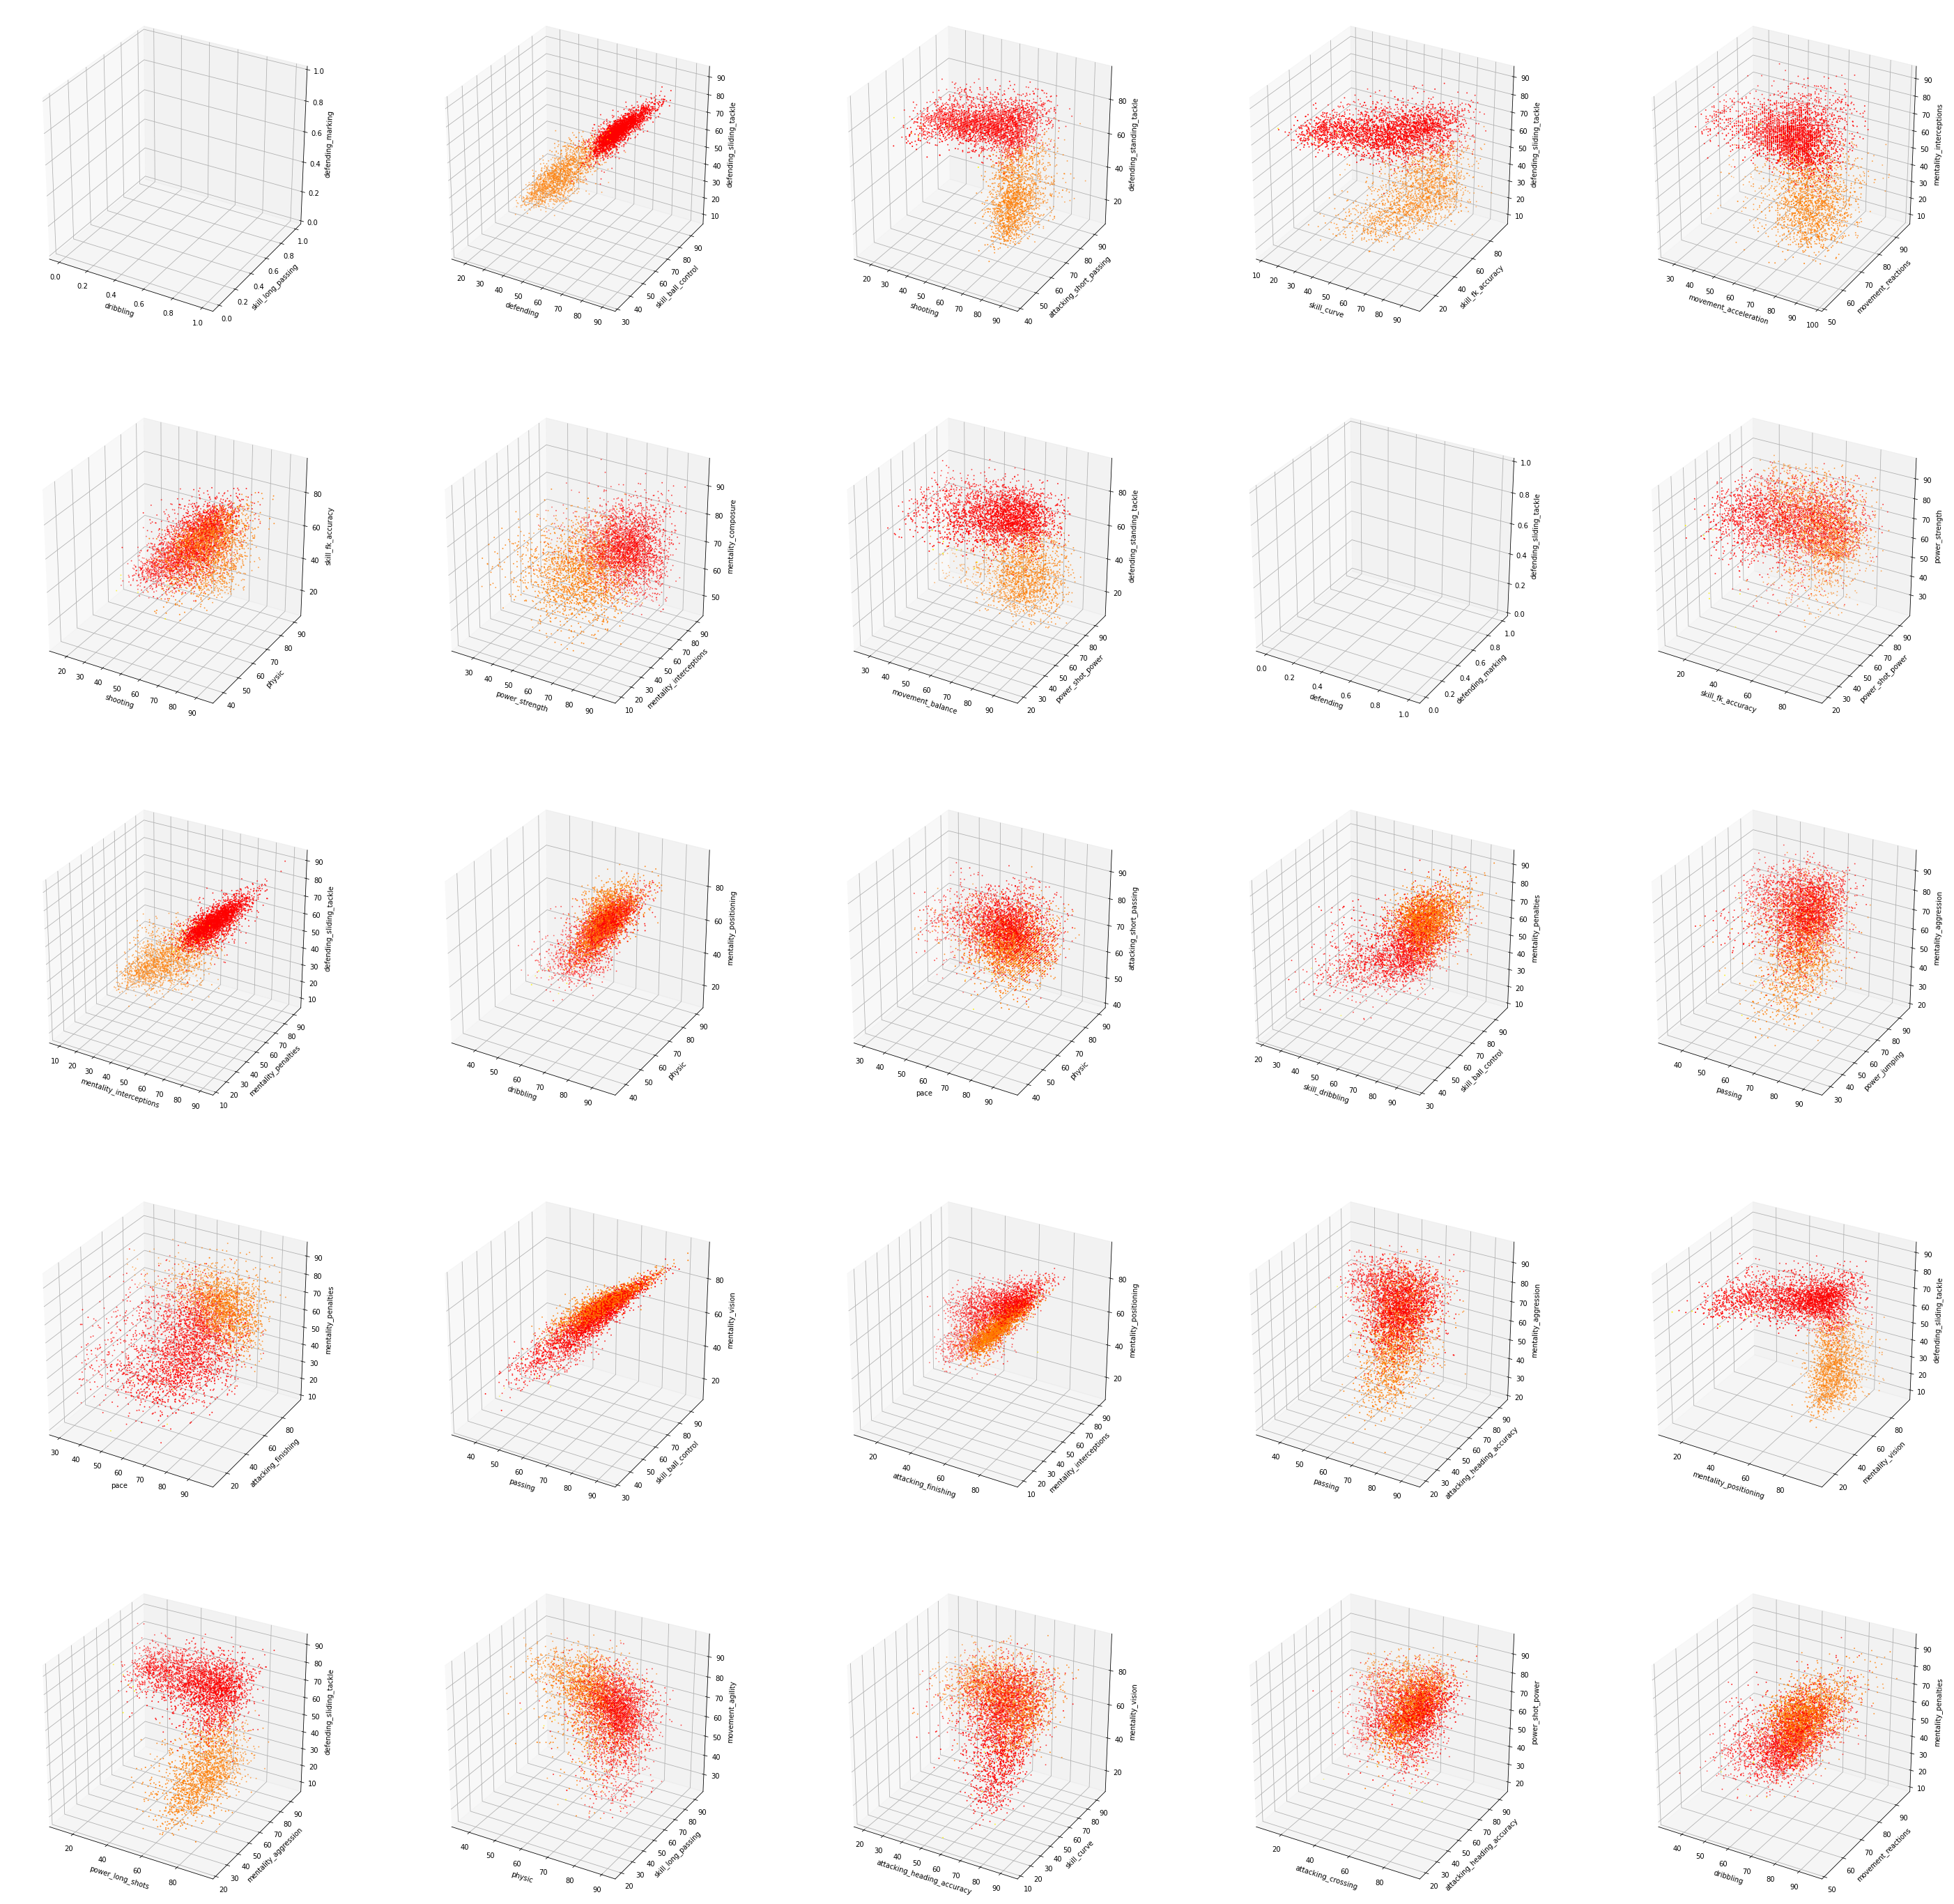

In [ ]:
fig = plt.figure(figsize=(50,50))
cmap = plt.cm.hsv
norm = plt.Normalize(vmin=0, vmax=12)

for triplet in skills_triplets:
  ax = fig.add_subplot(5, 5, skills_triplets.index(triplet)+1, projection='3d')
  skill1 = triplet[0]
  skill2 = triplet[1]
  skill3 = triplet[2]
  ax.scatter(df_clusters[skill1].values, df_clusters[skill2].values, df_clusters[skill3].values,c=cmap(norm(df_clusters.MeanShiftNOGK.values)), s=1)
  ax.set_xlabel(skill1)
  ax.set_ylabel(skill2)
  ax.set_zlabel(skill3)

Gracias a que quitamos a los Arqueros de nuestro Dataset, que ya eran un cluster claramente distinto a los demás, podemos analizar en profundidad al resto del dataset, y se encuentren 3 otros clusters. El análisis de estos cluster, nos permite encontrar grupos de jugadores:
Los que se agrupan por Balance, por Stamina, por SprintSpeed, por StandingTackle. Aunque, debido a la alta dimensionalidad, existe solapamiento entre las clases.

#Análisis Extra con K-means

Algunos de los clusters encontrados refieren al nivel de habilidad de los jugadores. Por ejemplo, el cluster 1 es similar al 3 en cuanto a tipo de habilidades, pero está diferenciado porque en el 1 los jugadores tienen valores más altos en esas habilidades.
Nos puede interesar normalizar los valores de los jugadores, de manera de poder separarlos por grupo de habilidades, y no por nivel de habilidad dentro de dicho grupo:

In [ ]:
from sklearn.cluster import estimate_bandwidth
df_skills_norm = df_skills.div(df_skills.sum(axis=1), axis=0) #SE NORMALIZA EL VALOR DE LAS HABILIDADES FILA A FILA

n_clust = 10

km3 = KMeans(n_clusters=n_clust)
km3.fit(df_skills_norm)


clusters3 = km3.labels_
cluster_centers2 = km3.cluster_centers_



labels_unique = np.unique(clusters3)
n_clusters_ = len(labels_unique)

print("Numero de clusters forzado por KMeans : %d" % n_clusters_)

Numero de clusters forzado por KMeans : 10


In [ ]:
df_skills_norm['MeanShiftNorm'] = clusters3
df_skills_norm['Position'] = df_clusters.player_positions
for cluster in range(10):
  print('Análisis descriptivo de cluster #', cluster,':')
  print('    Conteo:', sum(df_skills_norm.MeanShiftNorm == cluster))
  pos1 = df_skills_norm[df_skills_norm.MeanShiftNorm==cluster].Position.value_counts().index[0]
  amount1 = df_skills_norm[df_skills_norm.MeanShiftNorm==cluster].Position.value_counts()[0]
  pos2 = df_skills_norm[df_skills_norm.MeanShiftNorm==cluster].Position.value_counts().index[1]
  amount2 = df_skills_norm[df_skills_norm.MeanShiftNorm==cluster].Position.value_counts()[1]
  total = len(df_skills_norm[df_skills_norm.MeanShiftNorm==cluster])
  print('    Posiciones principales y participación en el cluster:', pos1, '%.2f' % (amount1/total), '//', pos2, '%.2f' % (amount2/total))
  print('    Principales Skills:')
  for skill, value in df_skills_norm[df_skills_norm.MeanShiftNorm==cluster].describe()[skills_ratings].loc['mean',:].sort_values(ascending=False)[:3].items():
    print('       ',skill,':', '%.2f' % value)
  print('    Peores Skills:')
  for skill, value in df_skills_norm[df_skills_norm.MeanShiftNorm==cluster].describe()[skills_ratings].loc['mean',:].sort_values(ascending=False)[-3:].items():
    print('       ',skill,':', '%.2f' % value)

Análisis descriptivo de cluster # 0 :
    Conteo: 451
    Posiciones principales y participación en el cluster: ST 0.47 // ST, RM 0.03
    Principales Skills:
        movement_sprint_speed : 0.04
        pace : 0.04
        movement_acceleration : 0.04
    Peores Skills:
        defending_standing_tackle : 0.01
        defending_sliding_tackle : 0.01
        defending_marking : 0.00
Análisis descriptivo de cluster # 1 :
    Conteo: 438
    Posiciones principales y participación en el cluster: CB 0.80 // CB, RB 0.06
    Principales Skills:
        power_strength : 0.04
        power_jumping : 0.04
        physic : 0.04
    Peores Skills:
        attacking_volleys : 0.02
        attacking_finishing : 0.02
        defending_marking : 0.00
Análisis descriptivo de cluster # 2 :
    Conteo: 520
    Posiciones principales y participación en el cluster: CM, CDM 0.21 // CDM, CM 0.12
    Principales Skills:
        attacking_short_passing : 0.03
        skill_ball_control : 0.03
        power_sh

In [ ]:
skill_1 = 'defending_sliding_tackle'
skill_2 = 'attacking_finishing'
Kmeans_norm_clusters = go.Scatter(x=df_skills_norm[skill_1], y=df_skills_norm[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'].str.cat(clusters3.astype(str), sep=', '),
                           marker=dict(
                                size=5,
                                color = clusters3.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

# crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
#                       text=df_n.loc[bool_crack,'Name'],
#                       textfont=dict(family='sans serif',size=10,color='black'),
#                       opacity=0.9,mode='text')

data=[Kmeans_norm_clusters]

layout = go.Layout(title="KMeans - Normalized skills",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Se puede observar como este nuevo análisis nos permite encontrar características particulares de tipo de jugadores:
ST (Delanteros) con skills principales de Sprint_speed, pace y acceleration (CLUSTER 1, color azul en el gráfico)

Vs

ST (Delanteros) con skills principales de strength, shot_power y heading_accuracy (CLUSTER 6, color amarillo/naranja en el gráfico)

Esto nos permite pensar la similitud entre jugadores que juegan en posiciones similares, sin importar si es crack o no, únicamente por su fortalezas y debilidades.